# **Predicting Online Shoppers Purchasing Intention**

by:\
Natih Bernan\
Raden Aurelius Andhika Viadinugraha\
Yusuf Fajar Mukti

In this work, we are trying to classify whether an online shopper would purchase a product or not, based on his/her behaviour on the website. We also want to know what are the most important factors that make customers decide to buy the product, so we can provide suggestions for e-commerce companies to increase the number of purchasing customer.\
\
The data used for this analysis is collected from https://www.kaggle.com/roshansharma/online-shoppers-intention


## Data Importing

First, we will import the data to the python environment using pandas

In [0]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Uploading the data

from google.colab import files
uploaded = files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention (4).csv


In [0]:
# Read the data

df=pd.read_csv("online_shoppers_intention.csv")

After the data is imported, we will check the first 5 rows of the data

In [0]:
# Show top 5 rows

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Next, we will show the descriptive statistics of the data

In [0]:
# Show descriptive statistics for numeric features

df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [0]:
# Show descriptive statistics for categorical features

df.describe(include = ["object", "bool"])

,Month,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3364,10551,9462,10422


From the output above, we can see that the dataset consist of 12330 rows and 18 columns. The "Revenue" column is telling us whether the user will buy a product or not (giving revenue to the company), so we use this as our target variable. The other 17 columns are the features, where 3 of them are categorical and the rest are numerical.

## Data Preprocessing

Before doing the analysis, we have to do data preprocessing. This step is very important because we will prepare the data so that it is ready to be analyzed\
\
First, we check the type of each column

In [0]:
df.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

We can see that 14 of them are numeric (either float or int) and 4 are categorical (including the target variable). Next, we want to know the number of unique categories for features with "object" type ("Month" and "VisitorType"). For features with "bool" type we already know that there are exactly two unique categories

In [0]:
for col_name in df.columns :
  if df[col_name].dtypes == 'object' :
    unique_cat = len(df[col_name].unique())
    print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'Month' has 10 unique categories
Feature 'VisitorType' has 3 unique categories


Next, we will check the presence of missing value in the dataset

In [0]:
df.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

From the output we can see the number of missing value for each column. To handle this, we choose to drop every row that contains missing value, because the number of missing value is low and not significant to the number of row in the dataset.

In [0]:
df = df.dropna()

Next, we will make the dummy variable for categorical features. This is done so that python can read the value and use it in the model. Making dummy variable means for every unique category in a categorical feature, we create a new column and assign value 0 or 1 to that column that represent the category of that row

In [0]:
df[['Weekend','Revenue']] = df[['Weekend','Revenue']].astype(int)

In [0]:
df = pd.get_dummies(df)

In [0]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [0]:
df.dtypes

Administrative                   float64
Administrative_Duration          float64
Informational                    float64
Informational_Duration           float64
ProductRelated                   float64
ProductRelated_Duration          float64
BounceRates                      float64
ExitRates                        float64
PageValues                       float64
SpecialDay                       float64
OperatingSystems                   int64
Browser                            int64
Region                             int64
TrafficType                        int64
Weekend                            int64
Revenue                            int64
Month_Aug                          uint8
Month_Dec                          uint8
Month_Feb                          uint8
Month_Jul                          uint8
Month_June                         uint8
Month_Mar                          uint8
Month_May                          uint8
Month_Nov                          uint8
Month_Oct       

In [0]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.895952,0.061497,2.124147,2.357584,3.148019,4.070477,0.232624,0.154920,0.035158,0.140224,0.014940,0.035076,0.023384,0.153784,0.273059,0.243423,0.044576,0.036375,0.137545,0.006902,0.855554
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.577926,0.199020,0.911566,1.718028,2.402211,4.024598,0.422522,0.361844,0.184185,0.347233,0.121317,0.183980,0.151127,0.360756,0.445549,0.429166,0.206380,0.187230,0.344435,0.082792,0.351556
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


To recap the preprocessing step, we have removed the missing value and making the dummy for categorical features. Now our dataset consists of 12316 rows and 29 columns, and it is ready for analysis

## Data Visualization

First we want to visualize our dataset. We do this to get some insights about our data before we do the analysis

In [0]:
import seaborn as sns

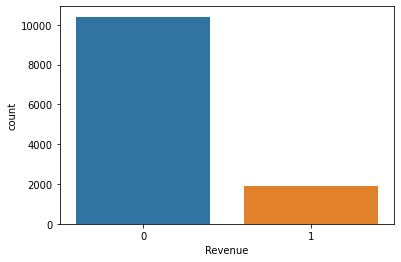

In [0]:
sns.countplot(df['Revenue'])

The barchart above shows the value of our target variable, "Revenue". From the chart we can see that most of the customers ended up did not purchase anything. Only 15.49% of the customers ended up purchasing something.

In [0]:
data = pd.read_csv("online_shoppers_intention.csv")

In [0]:
data = data.dropna()

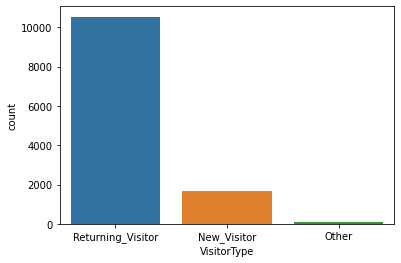

In [0]:
sns.countplot(data['VisitorType'])

The barchart above shows the frequency of the customers based on their type, whether they are returning visitor, new visitor, or other. Most of the customers are returning visitor.

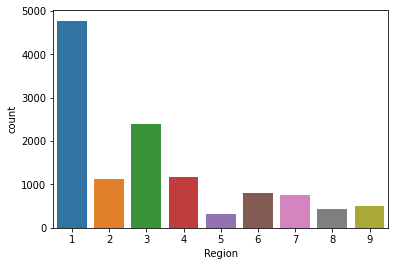

In [0]:
sns.countplot(data['Region'])

This chart shows the region where the customers are from. Region 1 is the region that has most customers come from, followed by region 3. Meanwhile, region 5, 8, and 9 have the lowest number of customers.

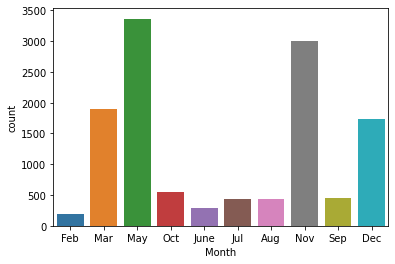

In [0]:
sns.countplot(data['Month'])

## Modelling

Next, we create the model for the dataset using Tensorflow library. Since the dependent variable are categorical (Revenue), then the analysis that we used are classification analysis. Here we use Multilayer Perceptron (MLP) architecture for the model. For comparison, we use 2 variation of MLP architecture based on Dropout usage (one who doesn't use Dropout and one who use Dropout with probability 0.2).

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout

In [0]:
from sklearn.model_selection import train_test_split

First, we have to separate the independent variable with dependent variable for the analysis.

In [0]:
X=df.drop('Revenue', axis=1)
Y=df['Revenue']

In [0]:
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4,1,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8,1,0,0,0,0,0,0,0,1,0,0,0,0,1
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13,1,0,0,0,0,0,0,0,1,0,0,0,0,1
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [0]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12316, dtype: int64

Next, we split the data into two smaller datasets (train and test data). The purpose of train dataset is to train the model, while the test dataset is to predict the dependent variable based on the model.

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

### Model 1

In [0]:
#network design
model = Sequential()
model.add(Input(shape=(28,)))
model.add(Dense(50,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1450      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 2,741
Trainable params: 2,741
Non-trainable params: 0
_________________________________________________________________


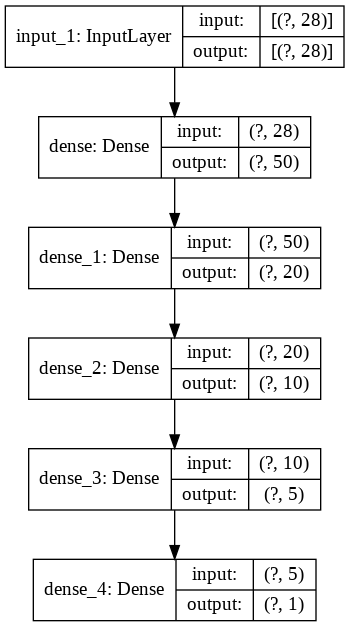

In [0]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=True)

In [0]:
history = model.fit(X_train, Y_train, batch_size=1, epochs=30, validation_data=(X_test,Y_test))

Epoch 1/30
8621/8621 [==============================] - 15s 2ms/step - loss: 1.6256 - accuracy: 0.8277 - val_loss: 0.4120 - val_accuracy: 0.8585
Epoch 2/30
8621/8621 [==============================] - 15s 2ms/step - loss: 0.4196 - accuracy: 0.8547 - val_loss: 0.3901 - val_accuracy: 0.8579
Epoch 3/30
8621/8621 [==============================] - 15s 2ms/step - loss: 0.4154 - accuracy: 0.8636 - val_loss: 0.3819 - val_accuracy: 0.8709
Epoch 4/30
8621/8621 [==============================] - 15s 2ms/step - loss: 0.3641 - accuracy: 0.8680 - val_loss: 0.3156 - val_accuracy: 0.8812
Epoch 5/30
8621/8621 [==============================] - 15s 2ms/step - loss: 0.3340 - accuracy: 0.8725 - val_loss: 0.3303 - val_accuracy: 0.8739
Epoch 6/30
8621/8621 [==============================] - 15s 2ms/step - loss: 0.3231 - accuracy: 0.8757 - val_loss: 0.3091 - val_accuracy: 0.8728
Epoch 7/30
8621/8621 [==============================] - 14s 2ms/step - loss: 0.3161 - accuracy: 0.8769 - val_loss: 0.3390 - val_ac

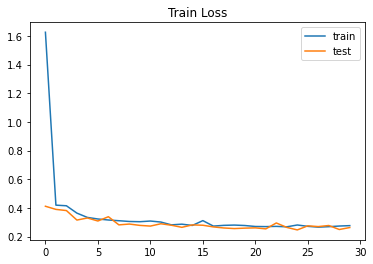

In [0]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title("Train Loss")
plt.legend()
plt.show()

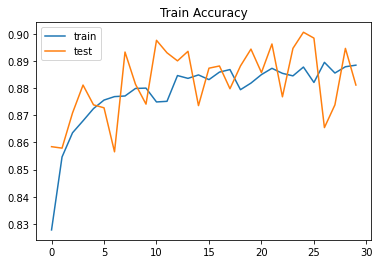

In [0]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title("Train Accuracy")
plt.legend()
plt.show()

From the first model, we find out that the loss value are decreasing and converges at 0.2768. For the accuracy, we can see that the accuracy on training data are 88.85% while on the test data are 88.12%.

### Model 2

In [0]:
#network design
model2 = Sequential()
model2.add(Input(shape=(28,)))
model2.add(Dense(50,activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(20,activation="relu"))
model2.add(Dense(10,activation="relu"))
model2.add(Dense(5,activation="relu"))
model2.add(Dense(1,activation="sigmoid"))
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                1450      
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 6         
Total params: 2,741
Trainable params: 2,741
Non-trainable params: 0
____________________________________________________

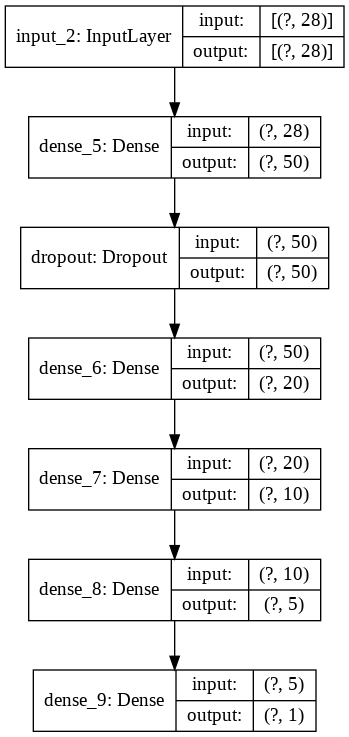

In [0]:
plot_model(model2, show_shapes=True, show_layer_names=True, expand_nested=True)

In [0]:
history2 = model2.fit(X_train, Y_train, batch_size=1, epochs=30, validation_data=(X_test,Y_test))

Epoch 1/30
8621/8621 [==============================] - 15s 2ms/step - loss: 0.5206 - accuracy: 0.8325 - val_loss: 0.4067 - val_accuracy: 0.8476
Epoch 2/30
8621/8621 [==============================] - 15s 2ms/step - loss: 0.4269 - accuracy: 0.8439 - val_loss: 0.3973 - val_accuracy: 0.8476
Epoch 3/30
8621/8621 [==============================] - 15s 2ms/step - loss: 0.4216 - accuracy: 0.8440 - val_loss: 0.4003 - val_accuracy: 0.8476
Epoch 4/30
8621/8621 [==============================] - 15s 2ms/step - loss: 0.4095 - accuracy: 0.8440 - val_loss: 0.3989 - val_accuracy: 0.8476
Epoch 5/30
8621/8621 [==============================] - 15s 2ms/step - loss: 0.4018 - accuracy: 0.8438 - val_loss: 0.3821 - val_accuracy: 0.8476
Epoch 6/30
8621/8621 [==============================] - 15s 2ms/step - loss: 0.3950 - accuracy: 0.8440 - val_loss: 0.3791 - val_accuracy: 0.8476
Epoch 7/30
8621/8621 [==============================] - 16s 2ms/step - loss: 0.3773 - accuracy: 0.8439 - val_loss: 0.3424 - val_ac

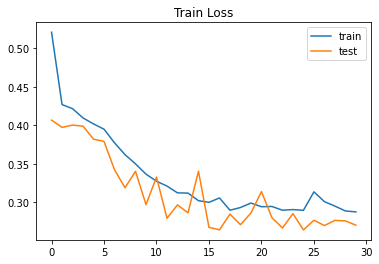

In [0]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.title("Train Loss")
plt.legend()
plt.show()

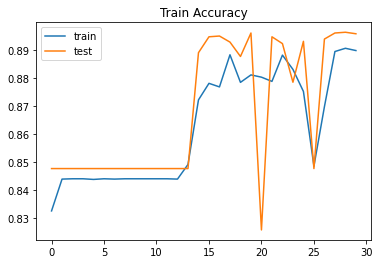

In [0]:
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='test')
plt.title("Train Accuracy")
plt.legend()
plt.show()

From the second model, we find out that the loss value are decreasing and converges at 0.2878. For the accuracy, we can see that the accuracy on training data are 88.98% while on the test data are 89.58%. Although the loss value are slightly greater than the first model, the accuracy that produced from the second model are greater than the first model, which means that this model (Model 2) performs better than Model 1.

## Conclussion

From the analysis that we conducted above, we can write some conclussion below :

- Most of the customers ended up did not purchase anything. Only 15.49% of the customers ended up purchasing something.
- The Dropout layer on the MLP architecture (Model 2) affect the model to perform better than the model that did not use Dropout layer.

Then, the recommendation that we can give to the Online Shop stakeholder are follows.

- We know that most of the customers ended up did not purchase anything. To increase the proportion of purchasing customers, the online shop can give some promo or discount for some products or in specific times, like Black Friday, National Online Shopping day (Harbolnas in Indonesia), Holidays, etc. And also, we also know that most of the online shop customers are the returning visitor. From the recommendation above, we can also increase the customer loyalty (and make new customers) so the revenue for the online shop can be increased.